In [77]:
import pandas as pd
from dask.dataframe import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from collections import Counter

In [78]:
df = pd.read_csv("ohtani_2024_pa_results.csv")

In [79]:
df.head()

,pitcher,events,home_team,away_team,pitch_name,release_speed,launch_speed,launch_angle,hit_distance_sc,bb_type
0,543037,field_out,NYY,LAD,Knuckle Curve,83.3,79.1,7.0,102.0,ground_ball
1,543037,strikeout,NYY,LAD,Knuckle Curve,87.3,NaN,NaN,NaN,NaN
2,543037,field_out,NYY,LAD,Changeup,90.4,88.2,29.0,317.0,fly_ball
3,596133,catcher_interf,NYY,LAD,Changeup,89.7,NaN,NaN,NaN,NaN
4,543037,field_out,NYY,LAD,4-Seam Fastball,95.6,93.2,45.0,289.0,fly_ball


In [80]:
hit_mapping = {
    'single': 1,
    'double': 1,
    'triple': 1,
    'home_run': 1,
    'walk': 1,
}

In [81]:
def get_opponent(row):
    if row['home_team'] == 'LAD':
        return row['away_team']
    else:
        return row['home_team']

In [82]:
df['target'] = df['events'].apply(lambda x: hit_mapping.get(x.lower(), 0))

In [83]:
df['opponent_team'] = df.apply(get_opponent, axis=1)

In [84]:
df.head(50)

,pitcher,events,home_team,away_team,pitch_name,release_speed,launch_speed,launch_angle,hit_distance_sc,bb_type,target,opponent_team
0,543037,field_out,NYY,LAD,Knuckle Curve,83.3,79.1,7.0,102.0,ground_ball,0,NYY
1,543037,strikeout,NYY,LAD,Knuckle Curve,87.3,NaN,NaN,NaN,NaN,0,NYY
2,543037,field_out,NYY,LAD,Changeup,90.4,88.2,29.0,317.0,fly_ball,0,NYY
3,596133,catcher_interf,NYY,LAD,Changeup,89.7,NaN,NaN,NaN,NaN,0,NYY
4,543037,field_out,NYY,LAD,4-Seam Fastball,95.6,93.2,45.0,289.0,fly_ball,0,NYY
5,661563,field_out,NYY,LAD,Slider,86.6,102.0,30.0,379.0,fly_ball,0,NYY
6,643410,strikeout,NYY,LAD,Split-Finger,85.7,NaN,NaN,NaN,NaN,0,NYY
7,661563,field_out,NYY,LAD,Slider,87.5,83.9,58.0,173.0,popup,0,NYY
8,657612,single,NYY,LAD,Sinker,88.9,103.8,14.0,266.0,line_drive,1,NYY
9,657376,field_out,NYY,LAD,Sinker,95.9,103.9,-17.0,9.0,ground_ball,0,NYY


In [85]:
X = df.drop(columns=['events', 'launch_speed', 'launch_angle', 'hit_distance_sc', 'bb_type','home_team', 'away_team', 'target'])

In [86]:
# X = pd.get_dummies(X, columns=['pitch_name'], dtype=int)

In [87]:
le = LabelEncoder()

X['pitch_id'] = le.fit_transform(X['pitch_name'])
X = X.drop(columns=['pitch_name'])

In [88]:
# X

In [89]:
le = LabelEncoder()

X['opponent_team_id'] = le.fit_transform(X['opponent_team'])
X = X.drop(columns=['opponent_team'])

In [90]:
# X = pd.get_dummies(X, columns=['opponent_team'], dtype=int)

In [91]:
X

,pitcher,release_speed,pitch_id,opponent_team_id
0,543037,83.3,4,17
1,543037,87.3,4,17
2,543037,90.4,1,17
3,596133,89.7,1,17
4,543037,95.6,0,17
...,...,...,...,...
823,663562,NaN,11,7
824,596295,NaN,11,7
825,595881,NaN,11,6
826,471911,NaN,11,6


In [92]:
y = df['target']

In [93]:
y

0      0
1      0
2      0
3      0
4      0
      ..
823    1
824    1
825    1
826    1
827    1
Name: target, Length: 828, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [95]:
# rus = RandomUnderSampler(random_state=42)
# X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
# print("Random undersampled training data distribution:", Counter(y_resampled_rus))

Random undersampled training data distribution: Counter({0: 249, 1: 249})


In [96]:
# print(X.isna().sum())

In [97]:
# nm = NearMiss(version=1)
# X_resampled_nm, y_resampled_nm = nm.fit_resample(X_train, y_train)
# print("NearMiss undersampled training data distribution:", Counter(y_resampled_nm))

In [98]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((662, 4), (662,), (166, 4), (166,))

In [99]:
# X_resampled_nm.shape, y_resampled_nm.shape

In [103]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# rf_model.fit(X_train, y_train)
# rf_model.fit(X_resampled_nm, y_resampled_nm)
# rf_model.fit(X_resampled_rus, y_resampled_rus)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [104]:
y_pred = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      0.57      0.62       104
           1       0.44      0.56      0.49        62

    accuracy                           0.57       166
   macro avg       0.56      0.57      0.56       166
weighted avg       0.59      0.57      0.57       166



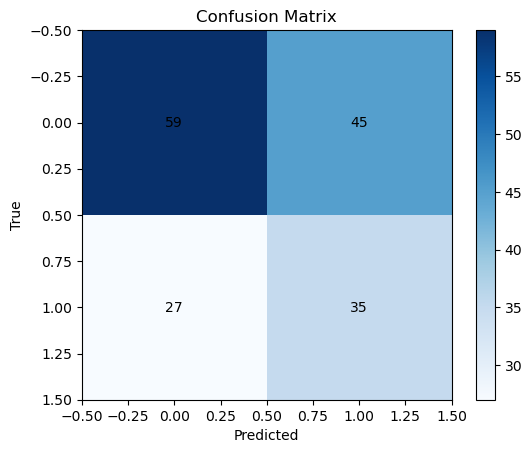

In [105]:
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
plt.colorbar(im)

# Add labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Add numbers on each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

In [106]:
team_distribution = df['target'].value_counts()
team_distribution

target
0    517
1    311
Name: count, dtype: int64